## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

from fastai.tabular import  add_datepart

from sklearn.linear_model import LinearRegression

from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

from pmdarima import auto_arima

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM


# Exploratory Data Analysis

In [2]:
#read the file
df = pd.read_csv('NSE-TATAGLOBAL11.csv')

#print the head
df.head(20)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05
5,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914.0,7162.35
6,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859.0,11859.95
7,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909.0,5248.60
8,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368.0,5503.90
9,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509.0,7999.55


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2018-10-08 to 2013-10-08
Data columns (total 8 columns):
Date                    1235 non-null datetime64[ns]
Open                    1235 non-null float64
High                    1235 non-null float64
Low                     1235 non-null float64
Last                    1235 non-null float64
Close                   1235 non-null float64
Total Trade Quantity    1235 non-null float64
Turnover (Lacs)         1235 non-null float64
dtypes: datetime64[ns](1), float64(7)
memory usage: 86.8 KB


In [31]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002EA94F533C8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002EAA07EA948>]], dtype=object)

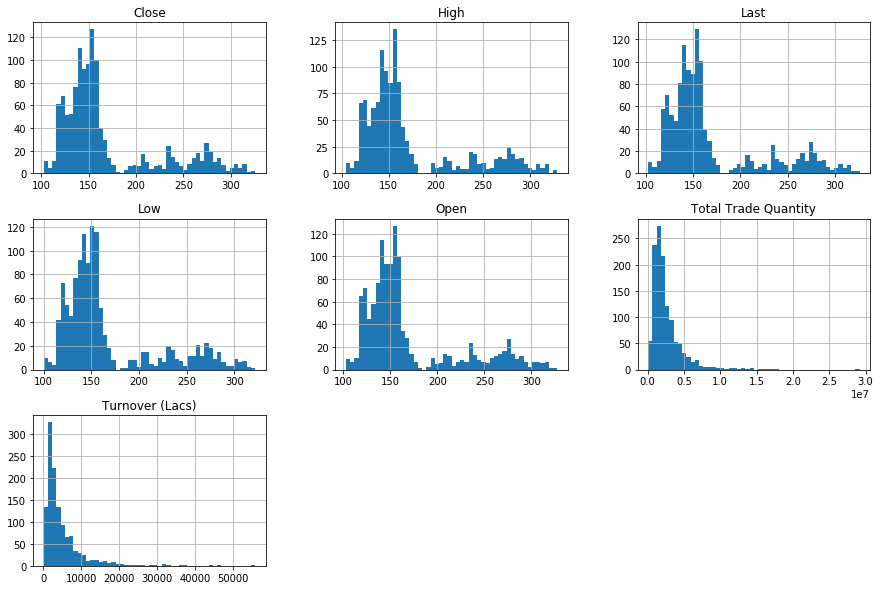

In [30]:
df.hist(bins=50,figsize=(15,10))

#### Plotting the Closed Stock Price with dates for visual

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


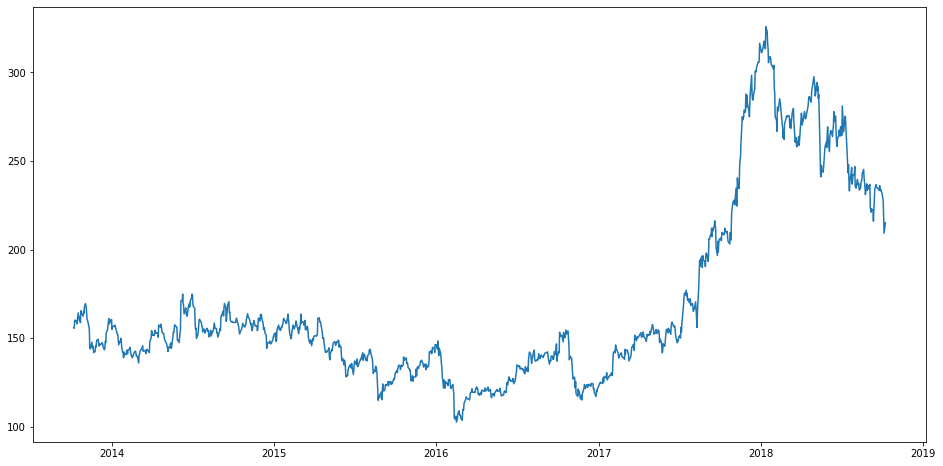

In [3]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

plt.figure(figsize=(16,8))
plt.plot(df['Close'])

#### Sorting index

In [4]:
data = df.sort_index(ascending=True, axis=0)

In [5]:
testing_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(len(data)):
    testing_data['Date'][i] = data['Date'][i]
    testing_data['Close'][i] = data['Close'][i]
testing_data

,Date,Close
0,2013-10-08 00:00:00,155.8
1,2013-10-09 00:00:00,155.55
2,2013-10-10 00:00:00,160.15
3,2013-10-11 00:00:00,160.05
4,2013-10-14 00:00:00,159.45
...,...,...
1230,2018-10-01 00:00:00,230.9
1231,2018-10-03 00:00:00,227.6
1232,2018-10-04 00:00:00,218.2
1233,2018-10-05 00:00:00,209.2


#### Creating features

#### Adding date part will create new features of day, week, year, month, dayofweek, etc for our data

In [6]:
add_datepart(testing_data, 'Date')

#dropping timestampe, which in this case is 'Elapsed' since the model cannot read the time stamp
testing_data.drop('Elapsed', axis=1, inplace=True)

In [7]:
testing_data['mon_fri'] = 0
length = len(testing_data)

for i in range(length):
    if (testing_data['Dayofweek'][i] == 0 or testing_data['Dayofweek'][i] == 4):
        testing_data['mon_fri'][i] = 1
    else:
        testing_data['mon_fri'][i] = 0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
testing_data

,Close,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,mon_fri
0,155.8,2013,10,41,8,1,281,False,False,False,False,False,False,0
1,155.55,2013,10,41,9,2,282,False,False,False,False,False,False,0
2,160.15,2013,10,41,10,3,283,False,False,False,False,False,False,0
3,160.05,2013,10,41,11,4,284,False,False,False,False,False,False,1
4,159.45,2013,10,42,14,0,287,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,230.9,2018,10,40,1,0,274,False,True,False,True,False,False,1
1231,227.6,2018,10,40,3,2,276,False,False,False,False,False,False,0
1232,218.2,2018,10,40,4,3,277,False,False,False,False,False,False,0
1233,209.2,2018,10,40,5,4,278,False,False,False,False,False,False,1


### Spliting the data into train and test sets

In [9]:
train = testing_data[:989]
test = testing_data[989:]

X_train = train.drop('Close', axis=1)
y_train = train['Close']
X_test = test.drop('Close', axis=1)
y_test = test['Close']


### Helper function to calculate Root Mean Square Error

In [10]:
def mse(y_true, y_pred):
    square = (y_true - y_pred)**2
    return np.average(square)

In [11]:
def rmse(y,y_predict):
        mean_sq = mse(y,y_predict)
        root = np.sqrt(mean_sq)
        return root

# Model Evaluation

## Linear Regression

In [12]:
linear_rg = LinearRegression()
linear_rg.fit(X_train,y_train)
y_predict_linear_reg = linear_rg.predict(X_test)

#### Root mean square error value for Linear Regression

In [13]:
rmse_Linear_Regression = rmse(y_test, y_predict_linear_reg)
print(rmse_Linear_Regression)

120.96697433421575


#### Plotting to compare y_test with y_predict_linear_reg

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


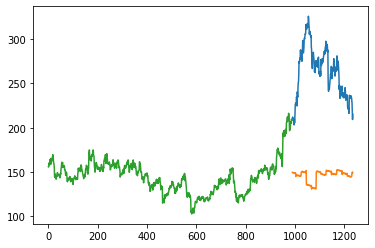

In [14]:
test['Predictions'] = 0
test['Predictions'] = y_predict_linear_reg
plt.plot(test[['Close', 'Predictions']])
plt.plot(train['Close'])

In [15]:
print(testing_data['mon_fri'])


0       0
1       0
2       0
3       1
4       1
       ..
1230    1
1231    0
1232    0
1233    1
1234    1
Name: mon_fri, Length: 1235, dtype: int64


## K-Nearest Neighbors

In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [17]:
#scaling data
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)
X_test_scaled = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
k_Nearest_model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
k_Nearest_model.fit(X_train,y_train)
y_predict_knn = k_Nearest_model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Root mean square error for kNN

In [18]:
rmse_knn = rmse(y_predict_knn, y_test)
print(rmse_knn)

115.46770696620123


#### Plotting for comparing y_test and y_predict_knn

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


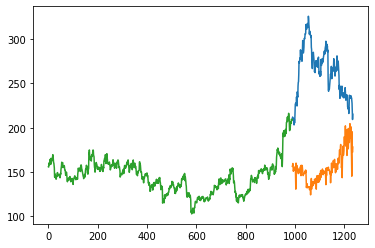

In [19]:
test['Predictions'] = 0
test['Predictions'] = y_predict_knn
plt.plot(test[['Close', 'Predictions']])
plt.plot(train['Close'])

## Auto ARIMA

In [20]:
train = data[:989]
valid = data[989:]

training = train['Close']
testing = test['Close']

auto_a = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
auto_a.fit(training)




Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4826.041, BIC=4850.458, Fit time=6.789 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=5488.748, BIC=5498.515, Fit time=0.091 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=5179.347, BIC=5198.881, Fit time=1.108 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4826.772, BIC=4846.306, Fit time=3.226 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=5486.757, BIC=5491.641, Fit time=0.081 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=5492.643, BIC=5512.177, Fit time=0.716 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=4824.949, BIC=4854.250, Fit time=7.323 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 12); setting score to inf (at 

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 1, 1, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [21]:
pred = auto_a.predict(n_periods=246)
pred = pd.DataFrame(pred,index = valid.index,columns=['Prediction'])

In [22]:
y_test=valid['Close']
y_predict= pred['Prediction']

#### Root mean square error for auto arima

In [23]:
rmse_auto_arima=rmse(y_test,y_predict)
print(rmse_auto_arima)

45.48707757385569


#### Plotting to compare y_test with y_predict

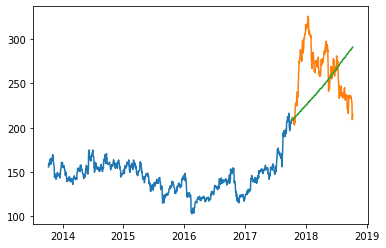

In [24]:
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(pred['Prediction'])


## Long Short Term Memory

In [25]:


# creating dataframe
data = df.sort_index(ascending=True, axis=0)
testing_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(len(data)):
    testing_data['Date'][i] = data['Date'][i]
    testing_data['Close'][i] = data['Close'][i]


#setting index
testing_data.index = testing_data.Date
testing_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = testing_data.values

train = dataset[0:989,:]
test = dataset[989:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

X_train, y_train = [], []
for i in range(60,len(train)):
    X_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

# create and fit the LSTM network
seq = Sequential()
seq.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
seq.add(LSTM(units=50))
seq.add(Dense(1))

seq.compile(loss='mean_squared_error', optimizer='adam')
seq.fit(X_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = testing_data[len(testing_data) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
y_predict_LSTM = seq.predict(X_test)
y_predict_LSTM = scaler.inverse_transform(y_predict_LSTM)

Train on 929 samples
929/929 - 77s - loss: 0.0012


#### Root mean square error for LSTM

In [27]:
rmse_LSTM = rmse(test, y_predict_LSTM)
print(rmse_LSTM)

8.920179513327213


#### Plotting to compare test with y_predict

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


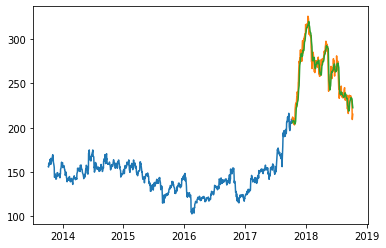

In [28]:
train = testing_data[:989]
test = testing_data[989:]
test['Predictions'] = y_predict_LSTM
plt.plot(train['Close'])
plt.plot(test[['Close','Predictions']])